In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
_pth = '/home/rpi2/Documents/forensic/data/day23/image_20250429_121216.jpg'
image = cv2.imread(_pth)

[ WARN:0@0.675] global loadsave.cpp:268 findDecoder imread_('/home/rpi2/Documents/forensic/data/day23/image_20250429_121216.jpg'): can't open/read file: check file path/integrity


In [3]:
def calculate_image_brightness(image):
    """Calculate average brightness of an image"""
    try:
        # Convert to grayscale if the image is in color
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray = image
        
        # Calculate average brightness
        return np.mean(gray)
    except Exception as e:
        print(f"Error calculating image brightness: {e}")
        return 0

In [4]:
calculate_image_brightness(image)

Error calculating image brightness: 'NoneType' object has no attribute 'shape'


0

In [5]:
from picamera2 import Picamera2
import libcamera
picam2 = Picamera2()
frame_size = (4608, 2592)

# Get initial exposure time based on time of day

config = picam2.create_still_configuration(
    {"size": frame_size},
    controls={"ExposureTime": 50000},
    transform=libcamera.Transform(vflip=1),
)
picam2.configure(config)
picam2.start()


[2:46:25.671489368] [9706]  INFO Camera camera_manager.cpp:327 libcamera v0.4.0+53-29156679
[2:46:25.693636400] [9728]  INFO RPI pisp.cpp:720 libpisp version v1.1.0 e7974a156008 27-01-2025 (21:50:51)
[2:46:25.695689934] [9728]  WARN CameraSensorProperties camera_sensor_properties.cpp:473 No static properties available for 'imx708_wide'
[2:46:25.695747619] [9728]  WARN CameraSensorProperties camera_sensor_properties.cpp:475 Please consider updating the camera sensor properties database
[2:46:25.711517917] [9728]  WARN CameraSensor camera_sensor_legacy.cpp:501 'imx708_wide': No sensor delays found in static properties. Assuming unverified defaults.
[2:46:25.712184343] [9728]  INFO RPI pisp.cpp:1179 Registered camera /base/axi/pcie@1000120000/rp1/i2c@80000/imx708@1a to CFE device /dev/media2 and ISP device /dev/media0 using PiSP variant BCM2712_C0
[2:46:25.720460797] [9706]  INFO Camera camera.cpp:1202 configuring streams: (0) 4608x2592-BGR888 (1) 4608x2592-GRBG_PISP_COMP1
[2:46:25.720661

999


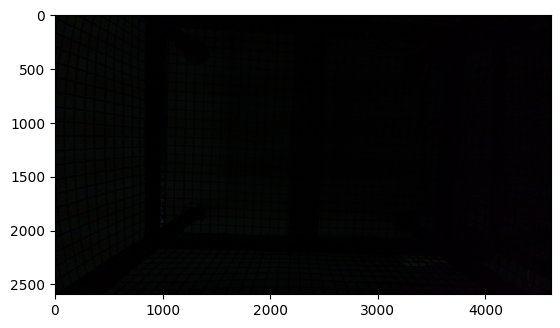

In [11]:
picam2.set_controls({'ExposureTime': 1000})
# time.sleep(3)
print(picam2.capture_metadata()['ExposureTime'])
request = picam2.capture_request(flush=True)
array = request.make_array('main')
# image = picam2.capture_array()
request.release()
plt.imshow(array)